# Project :  Predicts the cost of a part

### Muhammad Tahir @ Colorado State University

## Fast Radius

### Outlook:
#### I enjoyed learning a lot of new business questions. There are a lot of interesting things to explore further if I have more discussion and time. I got highest score with polynomial regression and random forest as compared to linear regression, SVM, ridge and lasso.
#### I want to try piple-line using decision tree, lasso and elasticnet,  or XGBoost etc. Also I need to do feature engineering (interaction, groupby etc) and parameter tuning for further optimization.

#### I am going to drop around 244 observations because they are structured missing in most columns.

#### Data is clearly small and our business interests need clarity like what we want to achieve; either metric score of which field (feature or column) is usually more important.

--- The work is done as following:
#### Part-1: Imports and Data Extraction
#### Part-2: Exploratory Data Analysis
#### Part-3: Model Prediction (model-1: linear regression, model-2: polynomial regression, model-3: ridge, model-4: lassocv, model-5: random forest, model-6: support vector machine)
#### Part-4: Model work for testing

## Part-1:  Imports and Data Extraction

### Imports

In [1]:
# Required Imports 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import train_test_split.
from sklearn.model_selection import train_test_split, cross_val_score

# Import linear regression
from sklearn.linear_model import LinearRegression


# Import metrics.
from sklearn import metrics
from sklearn.metrics import mean_squared_error

### Data Extraction

In [2]:
df_cost = pd.read_csv('best_ever_costs.csv')

In [3]:
df_cost.head()

,material,per_unit_cost,quantity,complexity_score,surface_area,bounding_box_volume,volume,max_x_length,max_y_length,max_z_length,optimal_fit_on_hp_build_plate
0,ABS-M30,30.67,2,8.951051,"{""units"": ""in^2/"", ""value"": 30.86906387028813}","{""units"": ""in^3/"", ""value"": 21.753358840942383}","{""units"": ""in^3/"", ""value"": 2.392122115044577}","{""units"": ""in"", ""value"": 7.431044101715088}","{""units"": ""in"", ""value"": 2.342428207397461}","{""units"": ""in"", ""value"": 1.2497128248214722}",1046.0
1,ABS-M30,644.38,3,9.128668,"{""units"": ""mm^2/"", ""value"": 751674.309321575}","{""units"": ""mm^3/"", ""value"": 5456805.5}","{""units"": ""mm^3/"", ""value"": 886843.7309218515}","{""units"": ""mm"", ""value"": 484.1076354980469}","{""units"": ""mm"", ""value"": 387.3500061035156}","{""units"": ""mm"", ""value"": 29.099998474121094}",46.0
2,ABS-M30,853.24,3,7.884523,"{""units"": ""mm^2/"", ""value"": 1004271.6988237221}","{""units"": ""mm^3/"", ""value"": 10672181.0}","{""units"": ""mm^3/"", ""value"": 1298836.9205762406}","{""units"": ""mm"", ""value"": 584.1876831054688}","{""units"": ""mm"", ""value"": 487.15765380859375}","{""units"": ""mm"", ""value"": 37.5}",31.0
3,ABS-M30,638.75,3,9.892117,"{""units"": ""mm^2/"", ""value"": 770573.781450489}","{""units"": ""mm^3/"", ""value"": 6037922.5}","{""units"": ""mm^3/"", ""value"": 917936.479691732}","{""units"": ""mm"", ""value"": 484.1076354980469}","{""units"": ""mm"", ""value"": 387.337646484375}","{""units"": ""mm"", ""value"": 32.20000076293945}",44.0
4,Ultem 1010,63.88,10,8.704826,"{""units"": ""mm^2/"", ""value"": 25472.59762170911}","{""units"": ""mm^3/"", ""value"": 335400}","{""units"": ""mm^3/"", ""value"": 85285.97260241448}","{""units"": ""mm"", ""value"": 100.0}","{""units"": ""mm"", ""value"": 129.0}","{""units"": ""mm"", ""value"": 26.0}",480.0


## Part-2: Exploratory Data Analysis

In [4]:
#checking info of the dataframe df_cost
df_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1076 entries, 0 to 1075
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   material                       1076 non-null   object 
 1   per_unit_cost                  1076 non-null   float64
 2   quantity                       1076 non-null   int64  
 3   complexity_score               832 non-null    float64
 4   surface_area                   1076 non-null   object 
 5   bounding_box_volume            1076 non-null   object 
 6   volume                         1076 non-null   object 
 7   max_x_length                   1076 non-null   object 
 8   max_y_length                   1076 non-null   object 
 9   max_z_length                   1076 non-null   object 
 10  optimal_fit_on_hp_build_plate  798 non-null    float64
dtypes: float64(3), int64(1), object(7)
memory usage: 92.6+ KB


In [5]:
#df1['surface_area'].apply(lambda x: json.loads(x)['value'])

In [6]:
# import json to read dict of few columns or fields
import json

In [7]:
# A function to convert length(mm/) into inch (inch)
def mm_inc1(x):
    x = json.loads(x)
    unit = x['units']
    value = x['value']
    if unit == "mm":
        return None if value is None else value*(0.039370)
    else:
        return None if value is None else value

In [8]:
# A function to convert volume(mm^3/) into inch (inch^3)
def mm_inc2(x2):
    x2 = json.loads(x2)
    unit = x2['units']
    value = x2['value']
    if unit == "mm^2/":
        return None if value is None else value*(0.00155)
    else:
        return None if value is None else value

In [9]:
# A function to convert volume(mm^3/) into inch (inch^3)
def mm_inc3(x3):
    x3 = json.loads(x3)
    unit = x3['units']
    value = x3['value']
    if unit == "mm^3/":
        return None if value is None else value*(0.0000610237)
    else:
        return None if value is None else value

In [10]:
df_cost_modified = df_cost.copy()

In [11]:
df_cost_modified.head()

,material,per_unit_cost,quantity,complexity_score,surface_area,bounding_box_volume,volume,max_x_length,max_y_length,max_z_length,optimal_fit_on_hp_build_plate
0,ABS-M30,30.67,2,8.951051,"{""units"": ""in^2/"", ""value"": 30.86906387028813}","{""units"": ""in^3/"", ""value"": 21.753358840942383}","{""units"": ""in^3/"", ""value"": 2.392122115044577}","{""units"": ""in"", ""value"": 7.431044101715088}","{""units"": ""in"", ""value"": 2.342428207397461}","{""units"": ""in"", ""value"": 1.2497128248214722}",1046.0
1,ABS-M30,644.38,3,9.128668,"{""units"": ""mm^2/"", ""value"": 751674.309321575}","{""units"": ""mm^3/"", ""value"": 5456805.5}","{""units"": ""mm^3/"", ""value"": 886843.7309218515}","{""units"": ""mm"", ""value"": 484.1076354980469}","{""units"": ""mm"", ""value"": 387.3500061035156}","{""units"": ""mm"", ""value"": 29.099998474121094}",46.0
2,ABS-M30,853.24,3,7.884523,"{""units"": ""mm^2/"", ""value"": 1004271.6988237221}","{""units"": ""mm^3/"", ""value"": 10672181.0}","{""units"": ""mm^3/"", ""value"": 1298836.9205762406}","{""units"": ""mm"", ""value"": 584.1876831054688}","{""units"": ""mm"", ""value"": 487.15765380859375}","{""units"": ""mm"", ""value"": 37.5}",31.0
3,ABS-M30,638.75,3,9.892117,"{""units"": ""mm^2/"", ""value"": 770573.781450489}","{""units"": ""mm^3/"", ""value"": 6037922.5}","{""units"": ""mm^3/"", ""value"": 917936.479691732}","{""units"": ""mm"", ""value"": 484.1076354980469}","{""units"": ""mm"", ""value"": 387.337646484375}","{""units"": ""mm"", ""value"": 32.20000076293945}",44.0
4,Ultem 1010,63.88,10,8.704826,"{""units"": ""mm^2/"", ""value"": 25472.59762170911}","{""units"": ""mm^3/"", ""value"": 335400}","{""units"": ""mm^3/"", ""value"": 85285.97260241448}","{""units"": ""mm"", ""value"": 100.0}","{""units"": ""mm"", ""value"": 129.0}","{""units"": ""mm"", ""value"": 26.0}",480.0


In [12]:
df_cost_modified['max_x_length'] = df_cost_modified['max_x_length'].apply(mm_inc1)

In [13]:
df_cost_modified['max_y_length'] = df_cost_modified['max_y_length'].apply(mm_inc1)

In [14]:
df_cost_modified['max_z_length'] = df_cost_modified['max_z_length'].apply(mm_inc1)

In [15]:
df_cost_modified['surface_area'] = df_cost_modified['surface_area'].apply(mm_inc2)

In [16]:
df_cost_modified['bounding_box_volume'] = df_cost_modified['bounding_box_volume'].apply(mm_inc3)

In [17]:
df_cost_modified['volume'] = df_cost_modified['volume'].apply(mm_inc3)

In [18]:
df_cost_modified.head()

,material,per_unit_cost,quantity,complexity_score,surface_area,bounding_box_volume,volume,max_x_length,max_y_length,max_z_length,optimal_fit_on_hp_build_plate
0,ABS-M30,30.67,2,8.951051,30.869064,21.753359,2.392122,7.431044,2.342428,1.249713,1046.0
1,ABS-M30,644.38,3,9.128668,1165.095179,332.994462,54.118486,19.059318,15.249970,1.145667,46.0
2,ABS-M30,853.24,3,7.884523,1556.621133,651.255972,79.259835,22.999469,19.179397,1.476375,31.0
3,ABS-M30,638.75,3,9.892117,1194.389361,368.456371,56.015880,19.059318,15.249483,1.267714,44.0
4,Ultem 1010,63.88,10,8.704826,39.482526,20.467349,5.204466,3.937000,5.078730,1.023620,480.0


In [19]:
#checking null values

In [20]:
df_cost_modified.isnull().sum()

material                           0
per_unit_cost                      0
quantity                           0
complexity_score                 244
surface_area                     244
bounding_box_volume              244
volume                           244
max_x_length                     244
max_y_length                     244
max_z_length                     244
optimal_fit_on_hp_build_plate    278
dtype: int64

In [21]:
df_cost_modified.replace(np.nan, None)

,material,per_unit_cost,quantity,complexity_score,surface_area,bounding_box_volume,volume,max_x_length,max_y_length,max_z_length,optimal_fit_on_hp_build_plate
0,ABS-M30,30.67,2,8.951051,30.869064,21.753359,2.392122,7.431044,2.342428,1.249713,1046.0
1,ABS-M30,644.38,3,9.128668,1165.095179,332.994462,54.118486,19.059318,15.249970,1.145667,46.0
2,ABS-M30,853.24,3,7.884523,1556.621133,651.255972,79.259835,22.999469,19.179397,1.476375,31.0
3,ABS-M30,638.75,3,9.892117,1194.389361,368.456371,56.015880,19.059318,15.249483,1.267714,44.0
4,Ultem 1010,63.88,10,8.704826,39.482526,20.467349,5.204466,3.937000,5.078730,1.023620,480.0
...,...,...,...,...,...,...,...,...,...,...,...
1071,ABS-M30i,25.76,500,6.085047,117.163076,70.051491,13.179232,16.952934,7.512938,0.550000,0.0
1072,PC-ABS,107.20,1,6.085047,117.163076,70.051491,13.179232,16.952934,7.512938,0.550000,0.0
1073,PC-ABS,107.20,1,6.085047,117.163076,70.051491,13.179232,16.952934,7.512938,0.550000,0.0
1074,PC-ABS,107.20,1,6.085047,117.163076,70.051491,13.179232,16.952934,7.512938,0.550000,0.0


In [22]:
df_cost_modified.isnull().sum()

material                           0
per_unit_cost                      0
quantity                           0
complexity_score                 244
surface_area                     244
bounding_box_volume              244
volume                           244
max_x_length                     244
max_y_length                     244
max_z_length                     244
optimal_fit_on_hp_build_plate    278
dtype: int64

<AxesSubplot:>

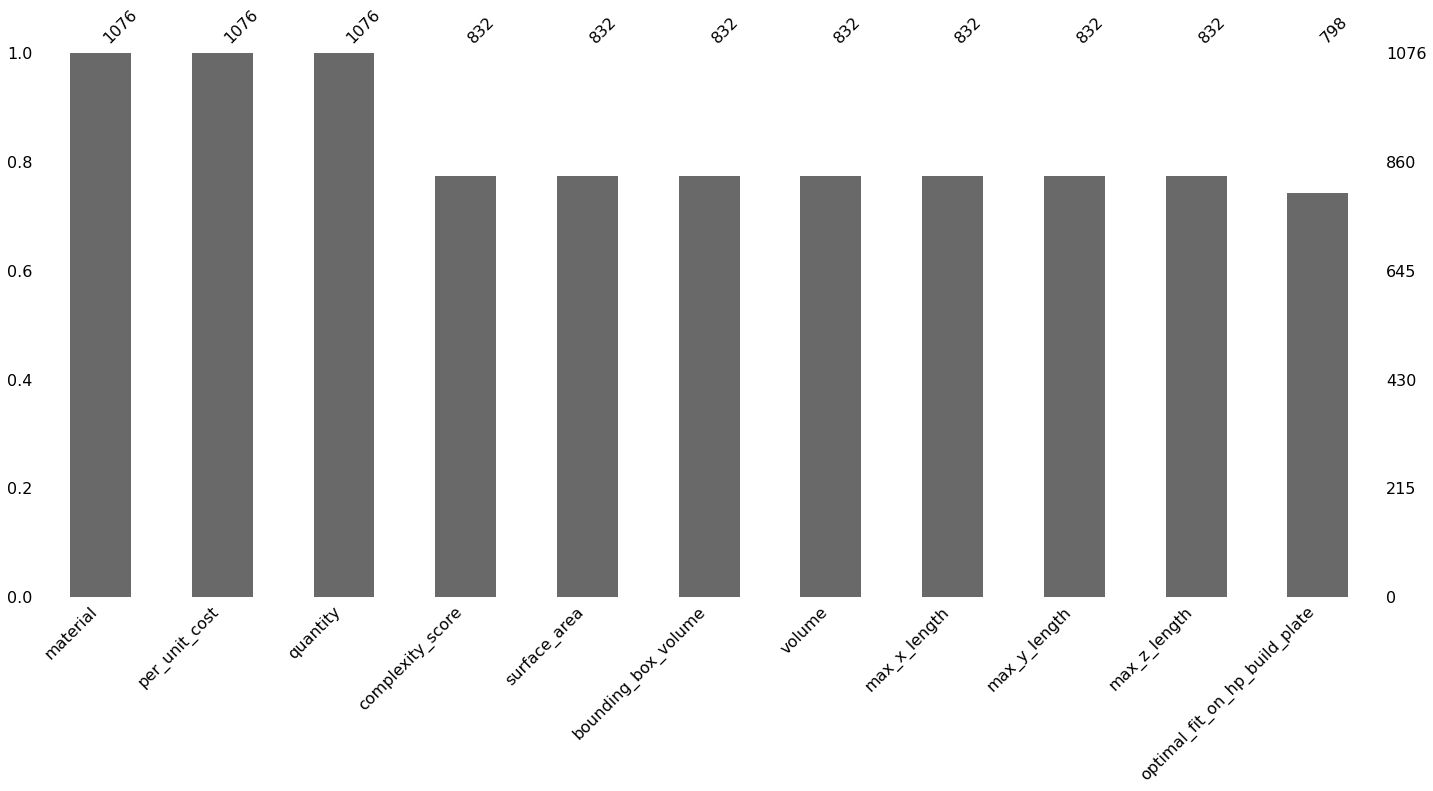

In [23]:
# bar chart to see missing visual in df3

import missingno as msno
msno.bar(df_cost_modified.sample(1076))

In [24]:
df_cost_final = df_cost_modified.dropna()

In [25]:
df_cost_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 798 entries, 0 to 1015
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   material                       798 non-null    object 
 1   per_unit_cost                  798 non-null    float64
 2   quantity                       798 non-null    int64  
 3   complexity_score               798 non-null    float64
 4   surface_area                   798 non-null    float64
 5   bounding_box_volume            798 non-null    float64
 6   volume                         798 non-null    float64
 7   max_x_length                   798 non-null    float64
 8   max_y_length                   798 non-null    float64
 9   max_z_length                   798 non-null    float64
 10  optimal_fit_on_hp_build_plate  798 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 74.8+ KB


In [26]:
df_cost_final.describe()

,per_unit_cost,quantity,complexity_score,surface_area,bounding_box_volume,volume,max_x_length,max_y_length,max_z_length,optimal_fit_on_hp_build_plate
count,798.000000,798.000000,798.000000,798.000000,7.980000e+02,7.980000e+02,798.000000,798.000000,798.000000,7.980000e+02
mean,296.696604,56.046366,8.233974,18437.172865,4.318067e+05,6.315429e+04,37.570478,25.131117,22.892515,1.987327e+05
std,903.591082,452.704727,1.530271,71420.312566,2.220493e+06,3.231049e+05,145.370976,82.227658,78.458126,1.738396e+06
min,0.490000,1.000000,0.000000,0.015675,1.696663e-04,4.768193e-05,0.036634,0.022146,0.014764,0.000000e+00
25%,22.737500,1.000000,7.696640,26.600419,1.055830e+01,1.504998e+00,2.477712,1.580026,1.000000,1.200000e+01
50%,76.250000,2.000000,8.919141,87.283354,5.234675e+01,9.352734e+00,5.131202,4.000099,3.041306,1.750000e+02
75%,255.812500,11.750000,9.085606,374.110972,4.971943e+02,5.566931e+01,13.373473,7.994743,8.145196,1.039000e+03
max,18967.000000,10000.000000,10.332533,480611.535597,3.684299e+07,3.582466e+06,1478.026001,762.000000,1478.026001,3.245873e+07


<AxesSubplot:>

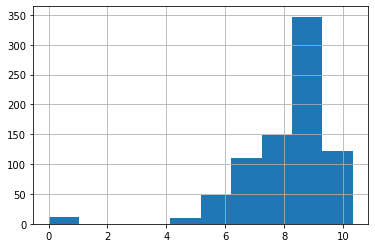

In [27]:
df_cost_final['complexity_score'].hist()

In [28]:
# 1. Correlation analysis (select features based on multicollinearity analysis) eg. drop surface area but no need
# 2. Log transform the following: 
#    a. all features except complexity score
#    b. target
# 3. use linear regression (try ridge and lasso and random forest)

In [29]:
df_cost_final_log = df_cost_final[df_cost_final.columns[1:]].applymap(lambda x: np.log(x+0.01))

In [30]:
df_cost_final_log['quantity'].describe()

count    798.000000
mean       1.453644
std        1.689771
min        0.009950
25%        0.009950
50%        0.698135
75%        2.464006
max        9.210341
Name: quantity, dtype: float64

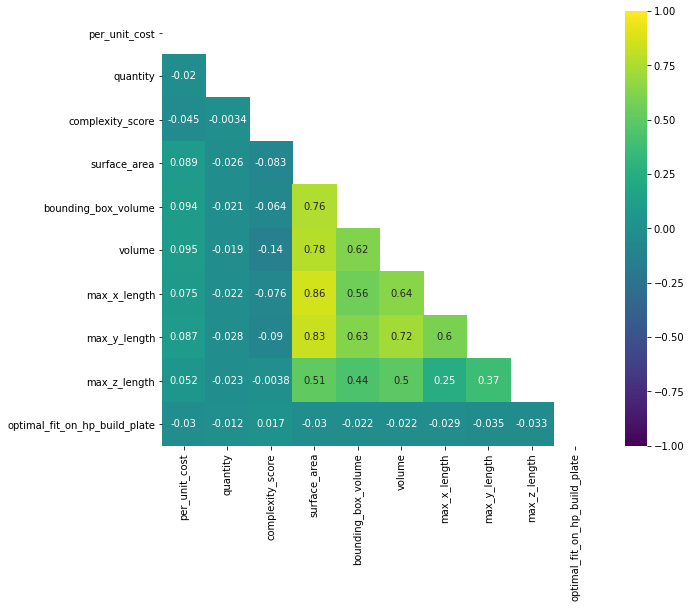

In [31]:
#visual of correlation between fields or columns
plt.figure(figsize=(10, 8))
mask = np.zeros_like(df_cost_final.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_cost_final.corr(), mask = mask, square = True, cmap = 'viridis', annot = True, vmin=-1, vmax=1);

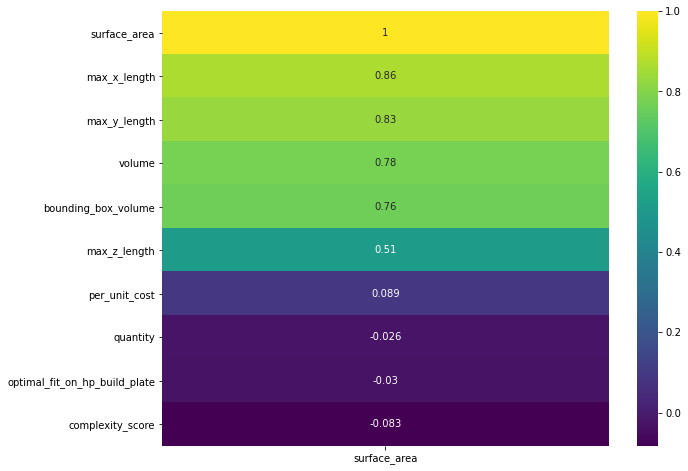

In [32]:
#visual of correlation between fields or columns
plt.figure(figsize=(10,8))

sns.heatmap(df_cost_final.corr()[['surface_area']].sort_values('surface_area', ascending=False), annot=True, cmap='viridis');

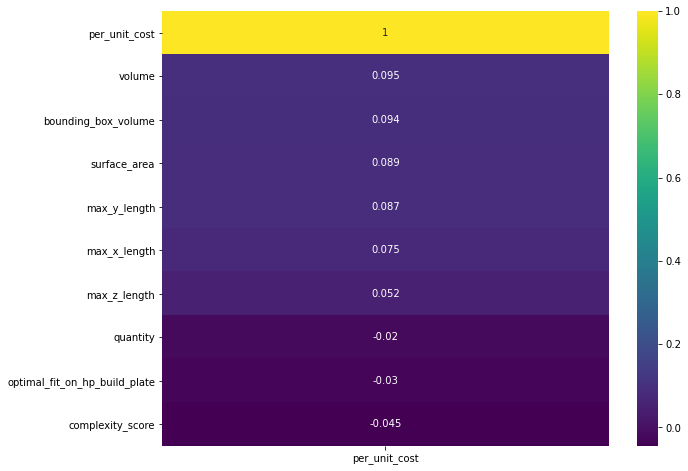

In [33]:
#visual of correlation between fields or columns
plt.figure(figsize=(10,8))

sns.heatmap(df_cost_final.corr()[['per_unit_cost']].sort_values('per_unit_cost', ascending=False), annot=True, cmap='viridis');

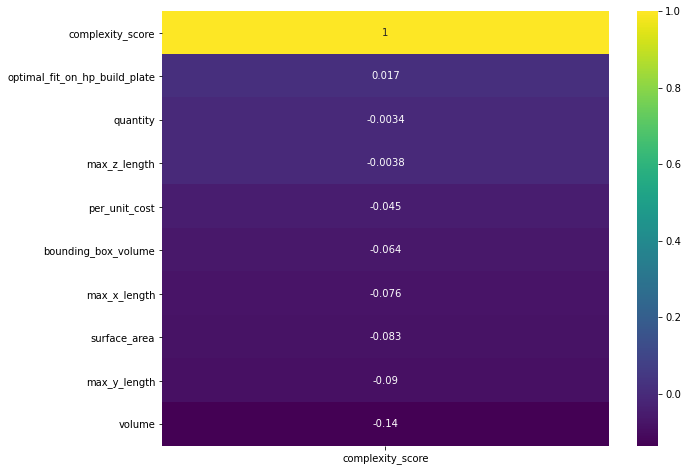

In [34]:
#visual of correlation between fields or columns
plt.figure(figsize=(10,8))

sns.heatmap(df_cost_final.corr()[['complexity_score']].sort_values('complexity_score', ascending=False), annot=True, cmap='viridis');

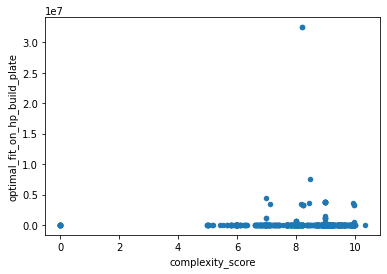

In [35]:
#Scatter plot to see relation between Retail and Carats
df_cost_final.plot(kind='scatter', x = 'complexity_score', y='optimal_fit_on_hp_build_plate');

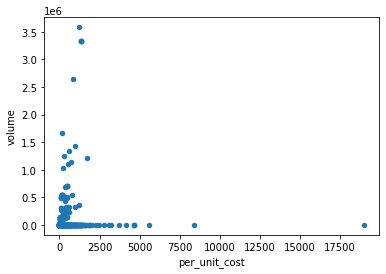

In [36]:
#Scatter plot to see relation between Retail and Carats
df_cost_final.plot(kind='scatter', x = 'per_unit_cost', y='volume');

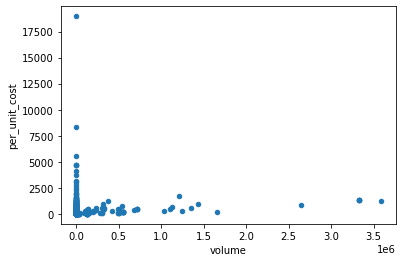

In [37]:
#Scatter plot to see relation between Retail and Carats
df_cost_final.plot(kind='scatter', x = 'volume', y='per_unit_cost');

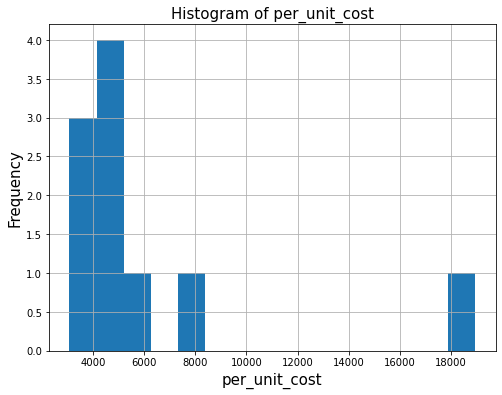

In [38]:
#visual of per_unit_cost
plt.figure(figsize = (8,6))
df_cost_final[df_cost_final['per_unit_cost']>3000]['per_unit_cost'].hist(bins=15)
plt.xlabel('per_unit_cost', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Histogram of per_unit_cost', size = 15)
plt.show();

In [39]:
df_cost_final['per_unit_cost'].describe()

count      798.000000
mean       296.696604
std        903.591082
min          0.490000
25%         22.737500
50%         76.250000
75%        255.812500
max      18967.000000
Name: per_unit_cost, dtype: float64

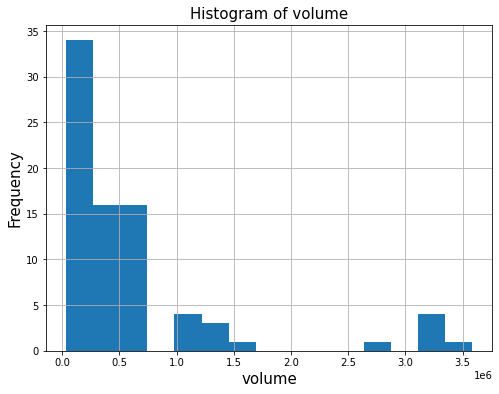

In [40]:
#visual of per_unit_cost
plt.figure(figsize = (8,6))
df_cost_final[df_cost_final['volume']>30000]['volume'].hist(bins=15)
plt.xlabel('volume', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Histogram of volume', size = 15)
plt.show();

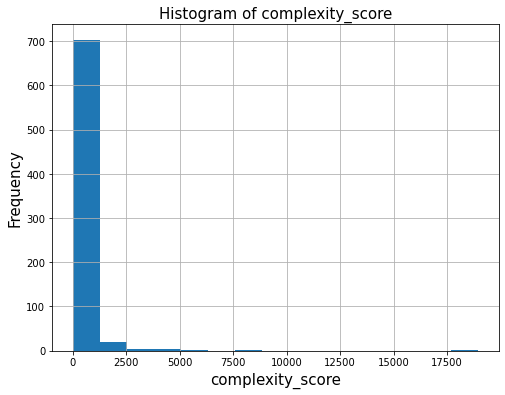

In [41]:
#visual of per_unit_cost
plt.figure(figsize = (8,6))
df_cost_final[df_cost_final['complexity_score']>6]['per_unit_cost'].hist(bins=15)
plt.xlabel('complexity_score', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Histogram of complexity_score', size = 15)
plt.show();

## Part-3:  Model Prediction

### Model-1: Linear Regression

In [42]:
df_cost_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 798 entries, 0 to 1015
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   material                       798 non-null    object 
 1   per_unit_cost                  798 non-null    float64
 2   quantity                       798 non-null    int64  
 3   complexity_score               798 non-null    float64
 4   surface_area                   798 non-null    float64
 5   bounding_box_volume            798 non-null    float64
 6   volume                         798 non-null    float64
 7   max_x_length                   798 non-null    float64
 8   max_y_length                   798 non-null    float64
 9   max_z_length                   798 non-null    float64
 10  optimal_fit_on_hp_build_plate  798 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 74.8+ KB


In [43]:
features = ['quantity', 'complexity_score', 'surface_area', 'bounding_box_volume', 'volume', 'max_x_length', 'max_y_length', 'max_z_length', 'optimal_fit_on_hp_build_plate'] # Create a list with features
X = df_cost_final_log[features] # Create the X (feature matrix)
X.head()

,quantity,complexity_score,surface_area,bounding_box_volume,volume,max_x_length,max_y_length,max_z_length,optimal_fit_on_hp_build_plate
0,0.698135,2.192888,3.430078,3.080228,0.876353,2.007011,0.855448,0.230884,6.952738
1,1.101940,2.212515,7.060567,5.808156,3.991361,2.948081,2.725233,0.144678,3.828859
2,1.101940,2.066169,7.350279,6.478918,4.372858,3.135906,2.954358,0.396340,3.434310
3,1.101940,2.292749,7.085399,5.909349,4.025814,2.948081,2.725201,0.245073,3.784417
4,2.303585,2.165026,3.676111,3.019319,1.651437,1.372956,1.627028,0.033067,6.173807


In [44]:
y = df_cost_final_log['per_unit_cost']

In [45]:
print(f"Features matrix: {X.shape}")
print(f"Target vector: {y.shape}")
print(f"Full dataset: {df_cost_final_log.shape}")

Features matrix: (798, 9)
Target vector: (798,)
Full dataset: (798, 10)


In [46]:
#train test split of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train.head()

,quantity,complexity_score,surface_area,bounding_box_volume,volume,max_x_length,max_y_length,max_z_length,optimal_fit_on_hp_build_plate
428,2.996232,2.298938,4.469274,4.772279,2.236737,2.469878,1.193906,1.115570,5.587286
137,0.698135,2.197742,6.411961,6.242327,5.260479,2.594021,1.324417,2.328251,2.485740
72,0.009950,2.191235,2.094638,0.931360,-1.290335,1.210864,1.085858,-1.324616,9.152394
77,2.080691,-4.605170,5.120538,5.259042,4.348343,1.932312,1.384174,1.947884,3.466048
538,0.009950,1.793105,13.068734,16.218960,15.018303,6.635960,6.635960,2.947592,-4.605170


In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
# Scale our data.
# Relabeling scaled data as "Z" is common.
sc = StandardScaler()
X_train_ss = sc.fit_transform(X_train)
X_test_ss = sc.transform(X_test)

In [49]:
lr = LinearRegression() # Instantiate a LinearRegression object
lr.fit(X_train, y_train) # Fit on TRAINING DATA ONLY!

LinearRegression()

In [50]:
# Train score
lr.score(X_train, y_train)

0.4218640365602845

In [51]:
# Test score
lr.score(X_test, y_test)

0.4706773643587894

In [52]:
# standard scale mode output for train
lr.score(X_train_ss, y_train)

-4.291741141289511

In [53]:
# standard scale mode output for test
lr.score(X_test_ss, y_test)

-2.6862647995379136

In [54]:
# get predictions from our X data
preds = lr.predict(X)
preds[0:5] # print first 5 predicted values

array([4.24186253, 5.15596629, 5.33222458, 5.19027572, 3.30354916])

In [55]:
# calculate residuals
residuals = y - preds
residuals[0:10]

0   -0.818252
1    1.312338
2    1.416828
3    1.269253
4    0.853614
5    0.209485
6   -0.716239
7   -0.730316
8   -0.317100
9    1.170943
Name: per_unit_cost, dtype: float64

In [56]:
# mean of residuals
np.mean(residuals)

-0.023414582877851812

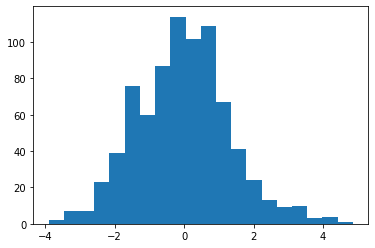

In [57]:
# Normality assumption
plt.hist(residuals, bins=20);

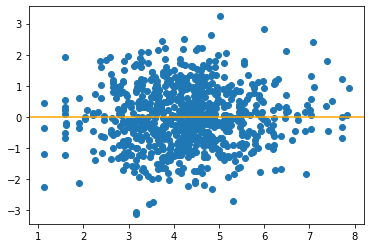

In [58]:
# Use np.random.randn to show what we expect in a residual plot
# create fake residuals
e_fake = np.random.randn(df_cost_final.shape[0])
plt.scatter(preds, e_fake)
plt.axhline(0, color='orange');

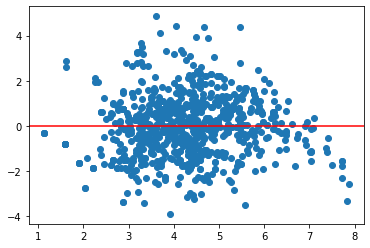

In [59]:
# Let's plot our residuals - check the L and E assumptions
plt.scatter(preds, residuals)
plt.axhline(0, color='red');

In [60]:
# Calcuate MAE by hand
np.abs(residuals).mean()

1.0506231583733425

In [61]:
# Via sklearn.metrics
metrics.mean_absolute_error(y, preds)

1.0506231583733419

In [62]:
# Calculate RSS by hand
sse = (residuals**2).sum()
sse

1445.9766273053028

In [63]:
# MSE by hand
sse / len(residuals)

1.8120007860968708

In [64]:
# MSE using sklearn
metrics.mean_squared_error(y_true=y, y_pred=preds)

1.8120007860968708

In [65]:
# RMSE
metrics.mean_squared_error(y_true=y, y_pred=preds, squared=False) # squared=False gives us RMSE

1.3461057856264012

In [66]:
# RMSE with np.sqrt of metrics.mean_squared_error
np.sqrt(metrics.mean_squared_error(y, preds))

1.3461057856264012

In [67]:
# How does the model score on the training and test data?
print(f"Training R-Squared: {lr.score(X_train_ss, y_train)}")
print(" ")
print(f"Testing R-Squared: {lr.score(X_test_ss, y_test)}")

Training R-Squared: -4.291741141289511
 
Testing R-Squared: -2.6862647995379136


### Model-2: Polynomial Features

In [68]:
from sklearn.preprocessing import PolynomialFeatures

# Instantiate our PolynomialFeatures object to create all two-way terms.
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

# Fit and transform our X data.
X_overfit = poly.fit_transform(X)

In [69]:
# Check out the dimensions of X_overfit.
X_overfit.shape

(798, 54)

In [70]:
# Import train_test_split.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [71]:
# Create train/test splits.
X_train, X_test, y_train, y_test = train_test_split(
    X_overfit,
    y,
    test_size=0.1, # Making sure that I have much LESS for training so we'll overfit
    random_state=42
)

In [72]:
# Scale our data.
# Relabeling scaled data as "Z" is common.
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

In [73]:
ols = LinearRegression()
ols.fit(Z_train, y_train) # Fit on the SCALED data

LinearRegression()

In [74]:
# How does the model score on the training and test data?
print(f"Training R-Squared: {ols.score(Z_train, y_train)}")
print(" ")
print(f"Testing R-Squared: {ols.score(Z_test, y_test)}")

Training R-Squared: 0.7125131167248624
 
Testing R-Squared: 0.6899689797536661


### Model-3: Ridge

In [75]:
# Ridge regressor lives here:
from sklearn.linear_model import Ridge

In [76]:
# Instantiate.
ridge = Ridge(alpha=10.0)

# Fit.
ridge.fit(Z_train, y_train)

# Evaluate model using R2.
print(f"Ridge Training R-Squared: {ridge.score(Z_train, y_train)}")
print(f"Ridge Testing R-Squared: {ridge.score(Z_test, y_test)}")

Ridge Training R-Squared: 0.549596109433391
Ridge Testing R-Squared: 0.5565846121915214


### Model-4: Lasso

In [77]:
# Imports similar to Ridge
from sklearn.linear_model import Lasso, LassoCV

In [78]:
# Set up a list of Lasso alphas to check.
l_alphas = np.logspace(-3, 0, 100)

# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(alphas=l_alphas, cv=5)

# Fit model using best ridge alpha!
lasso_cv.fit(Z_train, y_train);

/Users/tahir/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.25624276775090493, tolerance: 0.1772726665939066
  model = cd_fast.enet_coordinate_descent_gram(
/Users/tahir/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.18279358101437992, tolerance: 0.1772726665939066
  model = cd_fast.enet_coordinate_descent_gram(
/Users/tahir/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4242454902725967, tolerance: 0.1772726665939066
  model = cd_fast.enet_coordinate_descent_gram(
/Users/tahir/opt/anaconda3/lib/python3.8/site-pack

In [79]:
print(f"LASSO CV Training R-Squared: {lasso_cv.score(Z_train, y_train)}")
print(f"LASSO CV Testing R-Squared: {lasso_cv.score(Z_test, y_test)}")

LASSO CV Training R-Squared: 0.5679870827043805
LASSO CV Testing R-Squared: 0.5742360677779925


### Model-5: Random Forest

In [104]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressorRF = RandomForestRegressor(n_estimators = 3, random_state = 0)
regressorRF.fit(Z_train, y_train)

RandomForestRegressor(n_estimators=3, random_state=0)

In [105]:
# Evaluate model using R2.
print(f"RandomForestRegressor Training R-Squared: {regressorRF.score(Z_train, y_train)}")
print(f"RandomForestRegressor Testing R-Squared: {regressorRF.score(Z_test, y_test)}")

RandomForestRegressor Training R-Squared: 0.9425844870747669
RandomForestRegressor Testing R-Squared: 0.7892814313300834


### Model-6: Support Vector Machine

most important SVR parameter is Kernel type. It can be 
linear,polynomial or gaussian SVR. We have a non-linear condition 
so we can select polynomial or gaussian but here we select RBF(a gaussian type) kernel.

In [82]:
from sklearn.svm import SVR
regressorsvr = SVR(kernel = 'rbf', C=4, gamma=0.2, epsilon=.2)
regressorsvr.fit(Z_train, y_train)

SVR(C=4, epsilon=0.2, gamma=0.2)

In [83]:
# Evaluate model using R2.
print(f"SVR Training R-Squared: {regressorsvr.score(Z_train, y_train)}")
print(f"SVR Testing R-Squared: {regressorsvr.score(Z_test, y_test)}")

SVR Training R-Squared: 0.9527584999604497
SVR Testing R-Squared: 0.7864639270088775


my model is overfit on training dataset==High variance. Usually, high training score and low test score is over-fitting. Very low training score and low test score is under-fitting.

A clear sign of machine learning overfitting is if its error on the testing or validation dataset is much greater than the error on training dataset. opposite is underfitting.
overfiting can be solved with any regularization method and bias vs variance trade-off.


## Part-4: Model work for testing

In [84]:
#store model
import pickle
with open('final_model.pkl','wb') as f:
    pickle.dump(regressorRF, f)

In [85]:
#load trained model
#functionality for preprocessing
#from train import mm_2_inch

def predict(inp):
    #inp is going to be a dictionary instead of dataframe row
    #process the inp dictionary i.e. convert mm to inch etc etc. 
    #any other pre-processing
    #convert inp dictionary to input array/df row (X) lets call it inp_row
    #pass it to model predict function eg. pred = clf.predit(inp_row)
    #append it to inp dictionary, inp['predicted_cost'] = pred (maybe created a new dict, results={} and use that instead of inp)
    #retun inp (modified) (or results dictionary if you want to create that instead of using inp)
    pass

In [86]:
#load the model
with open('final_model.pkl','rb') as f:
    clf = pickle.load(f)

In [87]:
print(f"RandomForest Testing R-Squared: {clf.score(Z_test, y_test)}")

RandomForest Testing R-Squared: 0.7892814313300834


In [88]:
def predict(inp):
    #inp is going to be a dictionary instead of dataframe row
    #process the inp dictionary i.e. convert mm to inch etc etc. 
    #any other pre-processing
    #convert inp dictionary to input array/df row (X) lets call it inp_row
    #pass it to model predict function eg. pred = clf.predit(inp_row)
    #append it to inp dictionary, inp['predicted_cost'] = pred (maybe created a new dict, results={} and use that instead of inp)
    #retun inp (modified) (or results dictionary if you want to create that instead of using inp)
    pass

In [89]:
inp = {
        "material": "ABS - M30",
        "quantity": 2,
        "complexity_score": 8.951051,
        "surface_area": '{"units": "in^2/", "value": 30.86906387028813}',
        "bounding_box_volume": '{"units": "in^3/", "value": 21.753358840942383}',
        "volume": '{"units": "in^3/", "value": 2.392122115044577}',
        "max_x_length": '{"units": "in", "value": 7.431044101715088}',
        "max_y_length": '{"units": "in", "value": 2.342428207397461}',
        "max_z_length": '{"units": "in", "value": 1.2497128248214722}',
        "optimal_fit_on_hp_build_plate": 1046,
    }

In [90]:
inp['surface_area'] = mm_inc2(inp['surface_area'])

In [91]:
inp['bounding_box_volume'] = mm_inc3(inp['bounding_box_volume'])

In [92]:
inp['volume'] = mm_inc3(inp['volume'])

In [93]:
inp['max_x_length'] = mm_inc1(inp['max_x_length'])

In [94]:
inp['max_y_length'] = mm_inc1(inp['max_y_length'])

In [95]:
inp['max_z_length'] = mm_inc1(inp['max_z_length'])

In [96]:
inp

{'material': 'ABS - M30',
 'quantity': 2,
 'complexity_score': 8.951051,
 'surface_area': 30.86906387028813,
 'bounding_box_volume': 21.753358840942383,
 'volume': 2.392122115044577,
 'max_x_length': 7.431044101715088,
 'max_y_length': 2.342428207397461,
 'max_z_length': 1.2497128248214722,
 'optimal_fit_on_hp_build_plate': 1046}

In [97]:
inp_array = np.asarray(list(inp.values())[1:])

In [98]:
np.log(Z_test[0])

<ipython-input-98-af81007fb1b9>:1: RuntimeWarning: invalid value encountered in log
  np.log(Z_test[0])


array([        nan, -2.69232652, -0.86873638, -0.54361377, -0.36891174,
       -0.30374245,         nan, -0.1002429 ,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan, -0.95929239,
       -0.61880949, -0.4116213 , -0.40257955,         nan, -0.16325284,
               nan, -2.13912122, -1.80984147, -1.61863631, -1.23431467,
               nan, -0.89783719,         nan, -1.80789239, -1.73066336,
       -1.17923296,         nan, -1.00804677,         nan, -1.92042808,
       -1.13883816,         nan, -1.05923772,         nan, -1.01916054,
               nan, -0.4508102 ,         nan,         nan,         nan,
               nan, -0.82398376,         nan,         nan])

In [99]:
score = clf.predict(Z_test[0].reshape([1, -1]))

In [100]:
#append it to inp dictionary, inp['predicted_cost'] = pred (maybe created a new dict, results={} and use that instead of inp)
inp['predicted_cost'] = score

In [101]:
inp

{'material': 'ABS - M30',
 'quantity': 2,
 'complexity_score': 8.951051,
 'surface_area': 30.86906387028813,
 'bounding_box_volume': 21.753358840942383,
 'volume': 2.392122115044577,
 'max_x_length': 7.431044101715088,
 'max_y_length': 2.342428207397461,
 'max_z_length': 1.2497128248214722,
 'optimal_fit_on_hp_build_plate': 1046,
 'predicted_cost': array([7.10323522])}

predicted_cost by using polynomial regression is around 4 and random forest regression is around 7